# CSMODEL Machine Project (Phase 1) ☕✨
This Jupyter Notebook was made in compliance with the requirements set by the course Statistical Modelling and Simulation (CSMODEL). 

This machine project was prepared by the following students from section S16:
- Filipino, Eunice Marble R.
- Lazaro, Heisel Janine C.
- Punsalan, Emmanuel Gerald G.
- Wee, Justine Erika D.


# Import Libraries ⬇️

The following libraries are imported to provide essential functionalities for data processing, analysis, and visualization throughout this project:

In [29]:
%pip install openpyxl
%pip install scipy
%pip install seaborn
%pip install rapidfuzz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from rapidfuzz import process, fuzz

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

# Data Description ℹ️✨
The [Coffee Bean Sales Dataset](https://www.kaggle.com/datasets/saadharoon27/coffee-bean-sales-raw-dataset/data) provides comprehensive insights into the coffee industry. It contains detailed information on coffee orders, customer profiles and product details. The dataset is divided into three worksheets, providing specific information about orders, customers and products. The orders worksheet reflects the coffee transactions made by customers. The customers worksheet contains specific details on the customers. Lastly, the products worksheet details each coffee product.

### How the data was collected

The dataset was acquired from [Kaggle](https://www.kaggle.com) which houses datasets that may be from open sources, web scraping, or simulations. It is not outwardly stated how the coffee bean sales dataset was gathered, but it can be assumed that it was artificially generated for educational purposes due to the lack of details and metadata surrounding the orders.

### Potential Implications

As the data was collected through unknown sources, there are potential implications on how information was recorded. The lack of standardization across dataset fields may lead to discrepancies, inconsistencies, or misleading conclusions during data analysis. Additionally, the lack of metadata challenges to determine the scope of the dataset—increasing the risk of sampling bias. It also imposes constraints in preprocessing since the dataset was provided in a pre-cleaned format; hence, further restricting the accuracy and relevance of the insights that will be generated.

### Dataset Overview (Structure and Attributes)

The dataset is divided into three worksheets, which are the following:

**Orders:** Consists of **1,000 observations** and **9 variables**, where each observation represents an order. The attributes of which include:

| **Attribute** | **Description**                              |
|---------------|----------------------------------------------|
| **Order ID**  | A unique identifier for each order           |
| **Order Date**| The date the order was placed                |
| **Customer ID** | A reference to the customer who placed the order |
| **Product ID** | A reference to the product ordered          |
| **Quantity**  | The number of units ordered                  |

**Customers:** Consists of **1,000 observations** and **9 variables**, where each observation represents a distinct customer. The attributes of which include:

| **Attribute**     | **Description**                        |
|-------------------|----------------------------------------|
| **Customer ID**   | A unique identifier for each customer  |
| **Customer Name** | The full name of the customer          |
| **Email Address** | Contact email of the customer          |
| **Phone Number**  | Customer’s phone contact               |
| **Address Line 1**  | Primary street address of the customer |
| **City**            | City of the customer’s address         |
| **Country**         | Country of residence                   |
| **Postcode**        | Postal/ZIP code of the customer’s address |
| **Loyalty Card**    | Indicates whether the customer has a loyalty card (Yes/No) |

**Products:** Consists of **48 observations** and **7 variables**, where each observation represents a unique coffee product. The attributes of which include:

| **Attribute**     | **Description**                                     |
|-------------------|--------------------------------------------------- |
| **Product ID**    | A unique identifier for each product                |
| **Coffee Type**   | The blend or type of coffee (e.g., Arabica, Robusta)|
| **Roast Type**    | The level of roast (e.g., light, medium, dark)      |
| **Size**          | Packaging size of the product                      |
| **Unit Price**    | Retail price per unit                              |
| **Price per 100g**| Standardized pricing for comparison                |
| **Profit**        | Profitability of each product                      |

# Reading the Dataset 📝

With all that in mind, let's load in the dataset!

In [30]:
# Reading the Excel file
file_path = 'Coffee Bean Dataset.xlsx'

# Loading each worksheet into a separate DataFrame
orders = pd.read_excel(file_path, sheet_name = 'orders')
customers = pd.read_excel(file_path, sheet_name = 'customers')
products = pd.read_excel(file_path, sheet_name = 'products')

We should take a peek into the three worksheets to confirm our loading worked...

In [31]:
orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
customers.head()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [33]:
products.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


Eureka! The Coffee Bean Dataset has loaded into our Notebook.

But each worksheet only gives us partial information about the data... So, let's join the worksheets together to gain more insights!

In [34]:
# Merging Orders with Customers on 'Customer ID'
orders_customers = pd.merge(orders, customers, on = 'Customer ID', how = 'left')

# Merging the result with Products on 'Product ID'
coffee_df = pd.merge(orders_customers, products, on = 'Product ID', how = 'left')

Let's take another peek but now into the merged dataset.

In [35]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         1000 non-null   object        
 1   Order Date       1000 non-null   datetime64[ns]
 2   Customer ID      1000 non-null   object        
 3   Product ID       1000 non-null   object        
 4   Quantity         1000 non-null   int64         
 5   Customer Name_x  0 non-null      float64       
 6   Email_x          0 non-null      float64       
 7   Country_x        0 non-null      float64       
 8   Coffee Type_x    0 non-null      float64       
 9   Roast Type_x     0 non-null      float64       
 10  Size_x           0 non-null      float64       
 11  Unit Price_x     0 non-null      float64       
 12  Sales            0 non-null      float64       
 13  Customer Name_y  1000 non-null   object        
 14  Email_y          794 non-null    object  

We're all set! We can now proceed to cleaning the dataset.

# Data Cleaning 🧹✨ 

Before performing analysis, it is essential to clean the dataset so we ensure accuracy and reliability of results. We'll be handling variables and values with **multiple representations**, **incorrect datatypes**, **missing data**, **duplicate data**, **inconsistent formatting**, and **outliers**.

But let's look at the dataset and its variables again!

In [36]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         1000 non-null   object        
 1   Order Date       1000 non-null   datetime64[ns]
 2   Customer ID      1000 non-null   object        
 3   Product ID       1000 non-null   object        
 4   Quantity         1000 non-null   int64         
 5   Customer Name_x  0 non-null      float64       
 6   Email_x          0 non-null      float64       
 7   Country_x        0 non-null      float64       
 8   Coffee Type_x    0 non-null      float64       
 9   Roast Type_x     0 non-null      float64       
 10  Size_x           0 non-null      float64       
 11  Unit Price_x     0 non-null      float64       
 12  Sales            0 non-null      float64       
 13  Customer Name_y  1000 non-null   object        
 14  Email_y          794 non-null    object  

There's a lot of variables we don't need. We can drop those. Goodbye!

In [37]:
# Dropping the useless columns
columns_to_drop = [
    'Customer Name_x', 
    'Email_x', 
    'Country_x', 
    'Coffee Type_x', 
    'Roast Type_x', 
    'Size_x', 
    'Unit Price_x', 
    'Sales']
clean_coffee_df = coffee_df.drop(columns = columns_to_drop)

# Renaming remaining columns for clarity
clean_coffee_df = clean_coffee_df.rename(columns = {
    'Customer Name_y': 'Customer Name',
    'Email_y': 'Email',
    'Country_y': 'Country',
    'Coffee Type_y': 'Coffee Type',
    'Roast Type_y': 'Roast Type',
    'Size_y': 'Size',
    'Unit Price_y': 'Unit Price'
})

clean_coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Rob,M,1.0,9.950,0.9950,0.5970
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Exc,M,0.5,8.250,1.6500,0.9075
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Ara,L,1.0,12.950,1.2950,1.1655
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Exc,M,1.0,13.750,1.3750,1.5125
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Rob,L,2.5,27.485,1.0994,1.6491


Looking good so far! We can now proceed to cleaning.

### Incorrect Datatypes

Incorrect Datatypes happen when the type of data stored in a column doesn’t match what it should be for correct analysis or operations. 

Strings shouldn't be stored as Floats! Dates shouldn't be stored as plain text... We might run into problems for computing.

So, let's correct these incorrects!

| **Attribute**       | **Data Type**    |
|---------------------|------------------|
| **Order ID**        | object (string)  |
| **Order Date**      | datetime64[ns]   |
| **Customer ID**     | object (string)  |
| **Product ID**      | object (string)  |
| **Quantity**        | int64            |
| **Customer Name**   | object (string)  |
| **Email**           | object (string)  |
| **Phone Number**    | object (string)  |
| **Address Line 1**  | object (string)  |
| **City**            | object (string)  |
| **Country**         | object (string)  |
| **Postcode**        | object (string)  |
| **Loyalty Card**    | object (string)  |
| **Coffee Type**     | object (string)  |
| **Roast Type**      | object (string)  |
| **Size**            | float64          |
| **Unit Price**      | float64          |
| **Price per 100g**  | float64          |
| **Profit**          | float64          |

Unique identifiers like the Order ID, Customer ID, and Product ID are stored as objects, specifically strings. No problems here!

In [38]:
print(type(clean_coffee_df['Order ID'].iloc[0]))
print(type(clean_coffee_df['Customer ID'].iloc[0]))
print(type(clean_coffee_df['Product ID'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>


Order Dates are stored as objects, specifically a datetime date. All good on this end!

In [39]:
print(type(clean_coffee_df['Order Date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


On that note, textual information like the Customer Name, Email, Address Line 1, City, Country, Phone Numbers, and Postcodes should be strings also.

In [40]:
print(type(clean_coffee_df['Customer Name'].iloc[0]))
print(type(clean_coffee_df['Email'].iloc[0]))
print(type(clean_coffee_df['Address Line 1'].iloc[0]))
print(type(clean_coffee_df['City'].iloc[0]))
print(type(clean_coffee_df['Country'].iloc[0]))
print(type(clean_coffee_df['Phone Number'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Oh no! All the other variables are correct but Postcodes are represented as ints, so let's fix that!

In [41]:
clean_coffee_df['Postcode'] = clean_coffee_df['Postcode'].astype(str)

In [42]:
print(type(clean_coffee_df['Postcode'].iloc[0]))

<class 'str'>


The Loyalty Card variable is filled with "Yes" and "No", but it would be much better to analyze boolean values. Would that be true or false?

In [43]:
clean_coffee_df['Loyalty Card'] = clean_coffee_df['Loyalty Card'].map({'Yes': True, 'No': False}).astype(bool)

In [44]:
print(type(clean_coffee_df['Loyalty Card'].iloc[0]))

<class 'numpy.bool'>


Numerical information like Unit Price, Price per 100g, Profit, Size, and Quantity are already floats and int respectively. No need for corrections!

In [45]:
print(type(clean_coffee_df['Unit Price'].iloc[0]))
print(type(clean_coffee_df['Price per 100g'].iloc[0]))
print(type(clean_coffee_df['Profit'].iloc[0]))
print(type(clean_coffee_df['Size'].iloc[0]))
print(type(clean_coffee_df['Quantity'].iloc[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


Information that uses the same set of values can be identified into categories. For the Coffee Type, Roast Type, and Size, we can convert them to the category datatype.

In [46]:
clean_coffee_df['Coffee Type'] = clean_coffee_df['Coffee Type'].astype('category')
clean_coffee_df['Roast Type'] = clean_coffee_df['Roast Type'].astype('category')

In [47]:
print(clean_coffee_df['Coffee Type'].dtype)
print(clean_coffee_df['Roast Type'].dtype)

category
category


We're all set, the datatypes now fit the variables! Good job!

### Multiple Representations

Some observations may have the same value but presented differently. That's what we call "Multiple Representations"

Just as an example, there are observations in Country "U.S.A", "United States of America", and "USA". That's too many! We have make America consistent again!

We can start with the categorical variables since they're expected to be consistent all throughout.

In [48]:
print(clean_coffee_df['Coffee Type'].unique())
print(clean_coffee_df['Roast Type'].unique())

['Rob', 'Exc', 'Ara', 'Lib']
Categories (4, object): ['Ara', 'Exc', 'Lib', 'Rob']
['M', 'L', 'D']
Categories (3, object): ['D', 'L', 'M']


There are 4 distinct objects for Coffee Type and there are no duplicates among the values found, same goes with the Roast Type. So, we can conclude that there are no multiple representations.

Same logic goes for the Country variable.

In [49]:
print(clean_coffee_df['Country'].unique())
print(clean_coffee_df['Country'].nunique())

['United States' 'Ireland' 'United Kingdom']
3


But it seems like there are so many values in the City variable!

In [50]:
print(clean_coffee_df['City'].nunique())

375


we have to check it manually. Keep your eyes peeled!

In [51]:
"""
cities = clean_coffee_df['City'].unique()

for city in cities:
    matches = process.extract(city, cities, scorer = fuzz.ratio, limit = 5)
    for match, score, _ in matches:
        if city != match and score > 85:
            print(f"{city} ↔ {match}: {score}")
"""

'\ncities = clean_coffee_df[\'City\'].unique()\n\nfor city in cities:\n    matches = process.extract(city, cities, scorer = fuzz.ratio, limit = 5)\n    for match, score, _ in matches:\n        if city != match and score > 85:\n            print(f"{city} ↔ {match}: {score}")\n'

### Missing Data

In [52]:
"""
clean_coffee_df = orders_customers[
    (orders_customers['Loyalty Card'].isin(['True', 'False'])) &
    (orders_customers['Quantity'].notnull())
]
clean_coffee_df.head()

clean_coffee_df.isnull().sum()
"""

"\nclean_coffee_df = orders_customers[\n    (orders_customers['Loyalty Card'].isin(['True', 'False'])) &\n    (orders_customers['Quantity'].notnull())\n]\nclean_coffee_df.head()\n\nclean_coffee_df.isnull().sum()\n"

In [53]:
"""
cities = pd.Series(cities)
duplicates = cities[cities.duplicated()]
print(duplicates)
"""

'\ncities = pd.Series(cities)\nduplicates = cities[cities.duplicated()]\nprint(duplicates)\n'

### Duplicate Data

### Inconsistent Formatting

In [54]:
spaces, capitalization

NameError: name 'spaces' is not defined

### Outliers

Our dataset is now squeaky clean! We can now proceed with analysis!

In [ ]:
clean_coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,True,Rob,M,1.0,9.950,0.9950,0.5970
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,True,Exc,M,0.5,8.250,1.6500,0.9075
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,True,Ara,L,1.0,12.950,1.2950,1.1655
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,False,Exc,M,1.0,13.750,1.3750,1.5125
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,False,Rob,L,2.5,27.485,1.0994,1.6491


# Target Research Question 🔬✨

#### _`"How can we optimize business strategies by understanding the factors that affect sales?"`_

In order to provide scope, purpose, and clarity, the above question will serve as the main foundation of data analysis upon the Coffee Bean Sale Dataset. It will guide in identifying patterns, relationships, and key insights that can inform business decision-making to hopefully draw insights on the coffee bean industry.

# Exploratory Data Analysis 🔍✨

Now that the dataset has been cleaned, we can start exploring it to better understand its structure, contents, and patterns.

People tend to prefer certain flavors of coffee depending on the season like how Pumpkin Spice Lattes take over Autumn. By knowing which coffee beans and roasts are most profitable, we can make smarter decisions about stocks and promotions. This begs the question...

### _`"Which coffee bean and roast type is the most profitable per season?"`_ ⛅📈✨

To answer this question, the variables of interest are:
- **`Order Date`**: the date an order was placed
- **`Coffee Type`**: the blend or type of coffee (e.g., Arabica, Robusta, Liberica, Excelsa)
- **`Roast Type`**: the level of roast (e.g., light, medium, dark)
- **`Profit`**: the amount of profit from a sale
- **`Quantity`**: the number of units ordered

#### **Seasons**

Since the customers from the dataset are mostly from the the United States of America, we will be using the seasons from that country. The seasons are specifically **winter**, **spring**, **summer** and **fall** and they will be derived from the `Order Date`.

In [56]:
# Assigning the seasons based on the month
def get_season(date) :
    month = date.month
    if month in [3, 4, 5] : return 'Spring'
    elif month in [6, 7, 8] : return 'Summer'
    elif month in [9, 10, 11] : return 'Fall'
    else: return 'Winter'

clean_coffee_df['Season'] = clean_coffee_df['Order Date'].apply(get_season)
clean_coffee_df[['Order Date', 'Season']].head()

,Order Date,Season
0,2019-09-05,Fall
1,2019-09-05,Fall
2,2021-06-17,Summer
3,2021-07-15,Summer
4,2021-07-15,Summer


#### **Total Quantity Sold For Each Coffee Type per Season**

In order to understand the seasonal demands per coffee type (e.g., Arabica, Robusta, Excelsa, Liberica), we will compute the total quantity sold for each coffee type per season. This will help us identify the coffee type that is most preferred during each season.

In [57]:
# Grouping by season and coffee type and summing up the quantity
coffee_total_quantity = clean_coffee_df.groupby(['Season', 'Coffee Type'])['Quantity'].sum().reset_index()

# Sorting the seasons in ascending order and quantity in descending order
coffee_total_quantity = coffee_total_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False])

print("Total Quantity Sold For Each Coffee Type per Season:\n")
print(coffee_total_quantity)

Total Quantity Sold For Each Coffee Type per Season:

    Season Coffee Type  Quantity
0     Fall         Ara       233
2     Fall         Lib       222
3     Fall         Rob       191
1     Fall         Exc       163
7   Spring         Rob       254
5   Spring         Exc       250
6   Spring         Lib       234
4   Spring         Ara       233
8   Summer         Ara       247
11  Summer         Rob       247
9   Summer         Exc       227
10  Summer         Lib       151
14  Winter         Lib       247
12  Winter         Ara       234
13  Winter         Exc       232
15  Winter         Rob       186


/var/folders/2n/jtj_28694xl2spms0jvt9wk00000gn/T/ipykernel_13001/2783062445.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_total_quantity = clean_coffee_df.groupby(['Season', 'Coffee Type'])['Quantity'].sum().reset_index()


During the **Fall** and **Summer**, the most sold coffee type for both seasons is **Arabica**, with a quantity of **233** and **247** units sold, respectively. During the **Spring**, the most sold coffee type is **Robusta**, with a quantity of **254** units sold. Lastly, during the **Winter**, the most sold coffee type is **Liberica**, with a quantity of **247** units sold. 

#### **Total Quantity Sold For Each Roast Type per Season**

In order to understand the seasonal demands per roast type (e.g., light, medium, dark), we will compute the total quantity sold for each roast type per season. This will help us identify the roast type that is most preferred during each season.

In [58]:
# Grouping by season and roast type and summing up the quantity
roast_total_quantity = clean_coffee_df.groupby(['Season', 'Roast Type'])['Quantity'].sum().reset_index()

# Sorting the seasons in ascending order and quantity in descending order
roast_total_quantity = roast_total_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False])

print("Total Quantity Sold For Each Roast Type per Season:\n")
print(roast_total_quantity)

Total Quantity Sold For Each Roast Type per Season:

    Season Roast Type  Quantity
2     Fall          M       309
0     Fall          D       250
1     Fall          L       250
4   Spring          L       364
5   Spring          M       328
3   Spring          D       279
6   Summer          D       311
7   Summer          L       301
8   Summer          M       260
9   Winter          D       316
10  Winter          L       315
11  Winter          M       268


/var/folders/2n/jtj_28694xl2spms0jvt9wk00000gn/T/ipykernel_13001/1701077661.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  roast_total_quantity = clean_coffee_df.groupby(['Season', 'Roast Type'])['Quantity'].sum().reset_index()


During the **Winter** and **Summer**, the most sold roast type for both seasons is **dark**, with a quantity of **316** and **311** units sold, respectively. During the **Fall**, the most sold roast type is **medium**, with a quantity of **309** units sold. Lastly, during the **Spring**, the most sold roast type is **light**, with a quantity of **364** units sold. 

#### **Top Quantity Sold For Each Coffee and Roast Type Combination per Season**


In order to be a step closer to identifying what coffee and roast type is the most profitable per season, we will compute for the most quantity sold coffee and roast type combination per season. This will help us compare which coffee and roast type combination is the most sold and the most profitable during each season.

In [59]:
# Grouping by season, coffee type, and roast type and summing up the quantity
combination_quantity = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Quantity'].sum().reset_index()

# Sorting and retrieving the top selling combination per season
top_combination_quantity = combination_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False]) \
                                   .groupby('Season').first().reset_index()

print("Top Quantity Sold for Each Coffee and Roast Type per Season:\n")
print(top_combination_quantity)

Top Quantity Sold for Each Coffee and Roast Type per Season:

   Season Coffee Type Roast Type  Quantity
0    Fall         Ara          M        98
1  Spring         Exc          L       106
2  Summer         Rob          D       110
3  Winter         Ara          M        98


/var/folders/2n/jtj_28694xl2spms0jvt9wk00000gn/T/ipykernel_13001/2428735198.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combination_quantity = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Quantity'].sum().reset_index()


During both the **Fall** and **Winter**, the most sold combination is **Arabica Medium Roast**, both having a quantity of **98** units sold. During the **Spring**, the most sold combination is **Excelsa Light Roast**, with a quantity of **106** units sold. During the **Summer**, the most sold combination is **Robusta Dark Roast**, with a quantity of **110** units sold.


#### **Most Profitable Coffee and Roast Type per Season**

In order to answer our main EDA question of determining which coffee bean and roast type combination is the most profitable per season, we will get the total profit of each coffee and roast type per season and retrieve the combinations with the highest total profit per season.


In [60]:
# Getting the total profit by multiplying quantity and profit
clean_coffee_df['Total Profit'] = clean_coffee_df['Quantity'] * clean_coffee_df['Profit']

# Grouping by season, coffee type, and roast type and then summing up the total profit for each group
combination_season_profit = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Total Profit'].sum().reset_index()

# the coffee and roast type combination with the highest total profit appears first
top_combination_per_season = combination_season_profit.sort_values(['Season', 'Total Profit'], ascending=[True, False]).groupby('Season').first().reset_index()

print(top_combination_per_season)

   Season Coffee Type Roast Type  Total Profit
0    Fall         Lib          D      168.6867
1  Spring         Lib          L      202.3411
2  Summer         Exc          M      167.8875
3  Winter         Lib          D      158.2490


/var/folders/2n/jtj_28694xl2spms0jvt9wk00000gn/T/ipykernel_13001/2060968344.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combination_season_profit = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Total Profit'].sum().reset_index()


The most profitable coffee and roast type combination during the **Fall** is **Liberica Dark Roast** in contrast to **Arabica Medium Roast** having the most quantity sold. The most profitable combination during **Spring** is **Liberica Light Roast** in contrast to **Excelsa Light Roast** having the most quantity sold. The most profitable combination during **Summer** is **Excelsa Medium Roast** in contrast to **Robusta Dark Roast** having the most quantity sold. Lastly, the most profitable combination during **Winter** is **Liberica Dark Roast** in contrast to **Arabica Medium Roast** having the most quantity sold.


#### **Which season has the highest overall coffee sales profit?**

Identifying the season with the highest overall coffee sales profit will help us understand which season generates the most coffee sales. By analyzing seasonal trends, businesses can better anticipate coffee demand and maximize profitability.


In [61]:
# Grouping by season and summing up total profit
season_profit = clean_coffee_df.groupby('Season')['Total Profit'].sum()

# Sorting the profit per season in descending order
season_profit_sorted = season_profit.sort_values(ascending=False)

print("Total Profit per Season:")
for season, profit in season_profit_sorted.items():
    print(f"{season}: ${'{:.2f}'.format(profit)}")

top_season = season_profit_sorted.idxmax()

print(f"\nSeason with the highest profit: {top_season}")

Total Profit per Season:
Spring: $1252.69
Fall: $1103.51
Winter: $1096.77
Summer: $1067.24

Season with the highest profit: Spring


The season that gives the highest overall coffee sales profit is **Spring** with a total profit of **$1,252.69**. The season with the least overall coffee sales profit is **Summer**.

#### **Visualization**

We will now use a line chart to visualize the coffee and roast type profit trends per season.

/var/folders/2n/jtj_28694xl2spms0jvt9wk00000gn/T/ipykernel_13001/2425373675.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_per_combo = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Total Profit'].sum().reset_index()


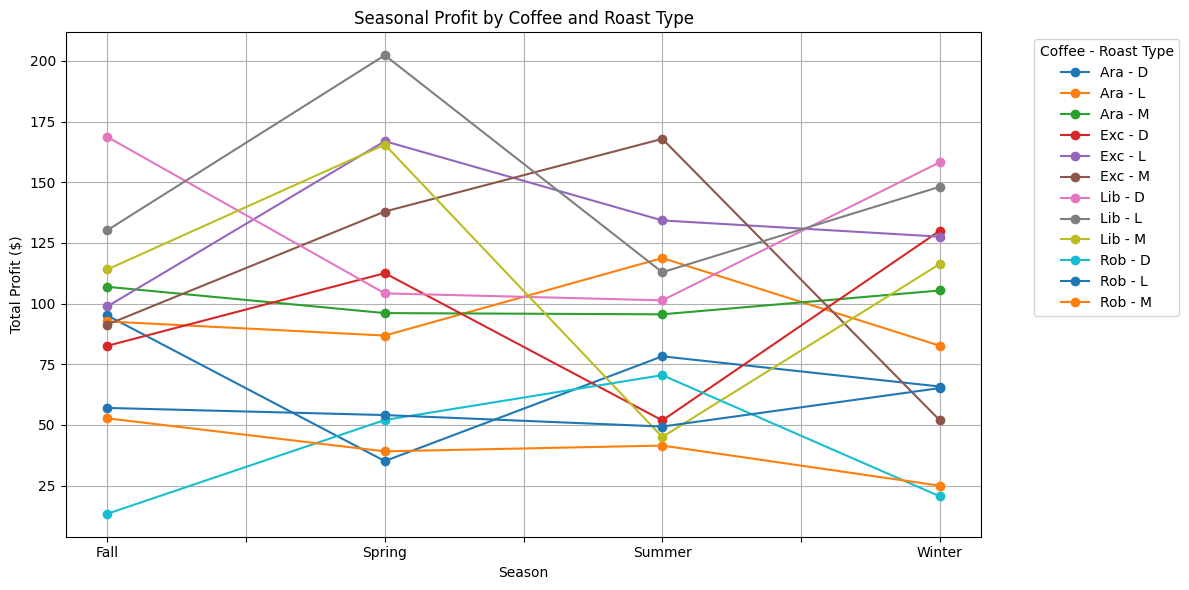

In [63]:
# Grouping by season, coffee and roast type to get total profit
profit_per_combo = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Total Profit'].sum().reset_index()

# Creating a column for combining coffee and roast type
profit_per_combo['CoffeeRoast'] = profit_per_combo['Coffee Type'].astype(str) + ' - ' + profit_per_combo['Roast Type'].astype(str)

pivot_df = profit_per_combo.pivot(index='Season', columns='CoffeeRoast', values='Total Profit')

pivot_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Seasonal Profit by Coffee and Roast Type")
plt.xlabel("Season")
plt.ylabel("Total Profit ($)")
plt.grid(True)
plt.legend(title="Coffee - Roast Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Figure 1. Line Chart of Seasonal Profits by Coffee and Roast Type**

The line chart shows the total profit made by each coffee and roast type combination on the y-axis. The four seasons are shown on the x-axis and a legend for each combination is shown on the upper right part of the figure.

The figure reflects the profitability of each coffee and roast type per season and as seen, **Spring** is the season  that gives the combination (**Liberica Light Roast**) with the highest total profit.

📌 **Conclusion**: To summarize, the best-selling coffee type, roast type and combination per season varies. The most profitable coffee and roast type combination during the **Fall** is **Liberica Dark Roast**, **Liberica Light Roast** during **Spring**, **Excelsa Medium Roast** during **Summer** and **Liberica Dark Roast** during **Winter**. Although the given combinations are the most profitable per season, they are not the best-selling in terms of quantity sold per season. Laslty, the season that yields the highest overall coffee sales profit is **Spring** and the least overall coffee sales happens during **Summer**.

### _`"How does loyalty card ownership influence customer purchasing behavior?"`_ 🧑💳✨

This analysis explores whether loyalty card ownership has an influence on customer purchasing behavior.  Specifically, we investigate whether there is a statistically significant difference in the number of coffee bean units ordered by customers who have a loyalty card compared to those who do not.

To do this, we focus on two variables:

- **`Loyalty Card`**: From the `customers` dataset, indicating whether a customer has a loyalty card (True or False).
- **`Quantity`**: From the `orders` dataset, representing how many units of coffee beans were ordered.

#### **Group by Ownership**

We then divide the dataset into two groups based on loyalty card status:
- `owners`: Customers who have a loyalty card (Loyalty Card == True)
- `non_owners`: Customers who do not have a loyalty card (Loyalty Card == False)

In [ ]:
owners = clean_coffee_df[clean_coffee_df['Loyalty Card'] == True]['Quantity']
non_owners = clean_coffee_df[clean_coffee_df['Loyalty Card'] == False]['Quantity']

ownership_table = pd.DataFrame({
    'Loyalty Card Owners': owners.reset_index(drop = True),
    'Non-Owners': non_owners.reset_index(drop = True)
})

ownership_table

,Loyalty Card Owners,Non-Owners
0,2.0,2
1,5.0,2
2,1.0,3
3,3.0,3
4,1.0,1
...,...,...
516,NaN,3
517,NaN,1
518,NaN,5
519,NaN,4


To assess the relationship, we use an **Independent Samples T-test**, which allows us to compare the means of two groups and determine whether any observed difference is statistically significant.

Before conducting the test, we define our hypotheses:

#### **Hypothesis Testing (T-test)**
**Null Hypothesis (H₀)**: Loyalty card ownership does not influence purchasing behavior.

**Alternative Hypothesis (Hₐ)**: Loyalty card ownership does influence purchasing behavior.

We will use an independent samples T-test to determine if the difference in purchasing behavior between loyalty card owners and non-owners is statistically significant based on the T-statistic and p-value.

In [ ]:
t_stat, p_value = ttest_ind(owners, non_owners, equal_var=False)

print(f"Owners Mean Quantity (True): {owners.mean():.2f}")
print(f"Non-Owners Mean Quantity (False): {non_owners.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Owners Mean Quantity (True): 3.48
Non-Owners Mean Quantity (False): 3.62
T-statistic: -1.3518
P-value: 0.1768


The average quantity ordered by **loyalty card owners** is **3.48**, while **non-owners** order an average of **3.62**.

The **T-statistic** is **-1.3518**, and the **p-value** is **0.1768**, which is greater than **0.05**. This means the result is **not statistically significant**. 

Therefore, we **fail to reject the null hypothesis**.

#### **Dot Plot**

The dot plot below further illustrates this relationship.

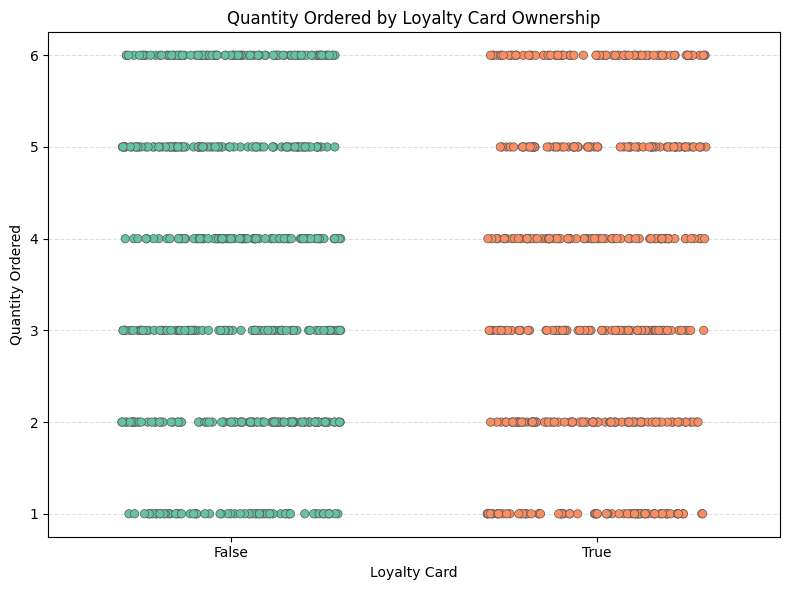

In [ ]:
plt.figure(figsize = (8, 6))
sns.stripplot(
    data = clean_coffee_df,
    x = 'Loyalty Card',
    y = 'Quantity',
    hue = 'Loyalty Card',       
    legend = False,             
    jitter = 0.3,
    size = 6,
    marker = 'o',
    edgecolor = 'auto',
    linewidth = 0.5,
    palette = 'Set2'
)

plt.title('Quantity Ordered by Loyalty Card Ownership')
plt.xlabel('Loyalty Card')
plt.ylabel('Quantity Ordered')
plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.4)

plt.tight_layout()
plt.show()

**Figure 3. Dot Plot of Quantity of Orders based on Loyalty Card Ownership**

The dot plot shows the distribution of coffee bean quantities ordered by customers, grouped by loyalty card ownership. Each dot represents a single transaction, with the quantity ordered on the y-axis and the loyalty card status on the x-axis.

As seen in the figure, loyalty card owners and non-owners display similar ordering patterns. This diagram aligns with the t-test results, which show no significant difference in mean quantity ordered between the groups (t = -1.3518, p = 0.1768).

📌 **Conclusion**: There is no statistically significant evidence that loyalty card ownership influences the quantity of coffee beans ordered.

While our initial analysis suggests that loyalty card ownership does not significantly affect overall purchasing behavior,  it does not directly answer whether those with loyalty cards tend to order larger quantities of coffee beans. A customer may still purchase larger quantites in order.

To further investigate this, we now ask:

**Do loyalty card owners order in larger quantities of coffee beans compared to non-owners?**

To answer this question, we use the same variables from the previous analysis:
- **`Loyalty Card`**: From the `customers` dataset, indicating whether a customer has a loyalty card (True or False).
- **`Quantity`**: From the `orders` dataset, representing how many units of coffee beans were ordered.

We will also use the same groupings from the initial analysis:
- `owners`: Customers who have a loyalty card (Loyalty Card == True)
- `non_owners`: Customers who do not have a loyalty card (Loyalty Card == False)

To investigate this, we will conduct a **One-tailed Independent Samples T-test** to determine if loyalty card owners purchase in larger amounts compared to non-owners.

Before conducting the test, we define our hypotheses:

**Null Hypothesis (H₀)**: Loyalty card owners do not order in larger quantities than non-owners (μ₁ ≤ μ₂).

**Alternative Hypothesis (Hₐ)**: Loyalty card owners order in larger quantities than non-owners (μ₁ > μ₂).

We will use a One-tailed Independent Samples T-test to determine if loyalty card owners order significantly more coffee beans than non-owners, based on the T-statistic and p-value.

In [ ]:
t_stat, p_value_two_tailed = ttest_ind(owners, non_owners, equal_var=False)
p_value_one_tailed = p_value_two_tailed / 2

print(f"Owners Mean Quantity (True): {owners.mean():.2f}")
print(f"Non-Owners Mean Quantity (False): {non_owners.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")

Owners Mean Quantity (True): 3.48
Non-Owners Mean Quantity (False): 3.62
T-statistic: -1.3518
One-tailed P-value: 0.0884


Thhe **One-tailed p-value** is **0.0884**, which is greater than **0.05**. This means the result is **not statistically significant**. 

Therefore, we **fail to reject the null hypothesis**.

This relationship is also shown in the bar plot below.

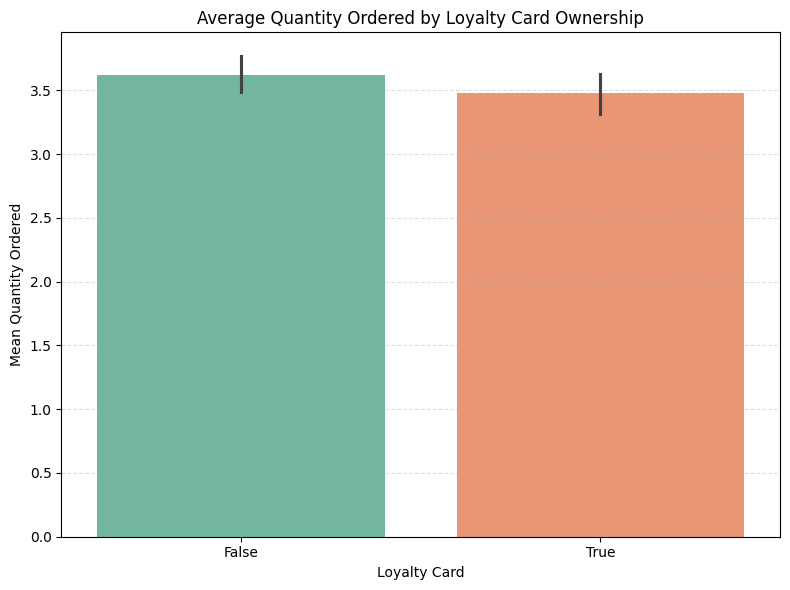

In [ ]:
plt.figure(figsize = (8, 6))
sns.barplot(
    data = clean_coffee_df,
    x = 'Loyalty Card',
    y = 'Quantity',
    hue = 'Loyalty Card',   
    palette = 'Set2',
    legend = False          
)
plt.title("Average Quantity Ordered by Loyalty Card Ownership")
plt.xlabel("Loyalty Card")
plt.ylabel("Mean Quantity Ordered")
plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.4)
plt.tight_layout()
plt.show()

**Figure 4. Bar Chart of Average Quantities Ordered based on Loyalty Card Ownership**

The bar plot displays the average quantity of coffee beans ordered by customers, grouped by loyalty card ownership. Each bar represents the mean quantity ordered for each group.

As shown above, loyalty card owners do not appear to order larger quantities than non-owners. It supports the one-tailed t-test result, which found no significant evidence to support the claim that loyalty card owners order in greater quantities (t = -1.3518, one-tailed p = 0.0884).

📌 **Conclusion**: There is insufficient evidence to conclude that loyalty card owners order in larger quantities of coffee beans compared to non-owners.

### _`"Do the coffee products with higher unit prices generate more profit?"`_ ☕💰✨

In this analysis, we aim to determine whether there is a statistical relationship between the **unit price** of coffee products and their **total profit**. Specifically, we want to know if products with higher prices tend to generate more profit.


To answer this question, we focus on the following variables from the `products` dataset:

- **`Unit Price`**: The retail price per unit of each coffee product.
- **`Profit`**: The total profit associated with each product.

To assess this, we will use the **Pearson correlation coefficient**, which measures the strength and direction of a linear relationship between two continuous variables.

Before conducting the test, we define our hypotheses:

**Null Hypothesis (H₀)**: There is no linear correlation between unit price and profit.  
**Alternative Hypothesis (Hₐ)**: There is a significant linear correlation between unit price and profit.

We will calculate the Pearson correlation coefficient and interpret both the correlation value and the associated p-value to determine if the result is statistically significant.

In [ ]:
corr, p_value = pearsonr(products['Unit Price'], products['Profit'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation: 0.939
P-value: 0.0000


The Pearson correlation coefficient between **Unit Price** and **Profit** is **0.939**, indicating a **very strong positive linear relationship**. 

Additionally, the **p-value is less than 0.05** (p = 0.0000), which means the result is **statistically significant**. Therefore, we **reject the null hypothesis**.

The following scatterplot further illustrates this relationship.

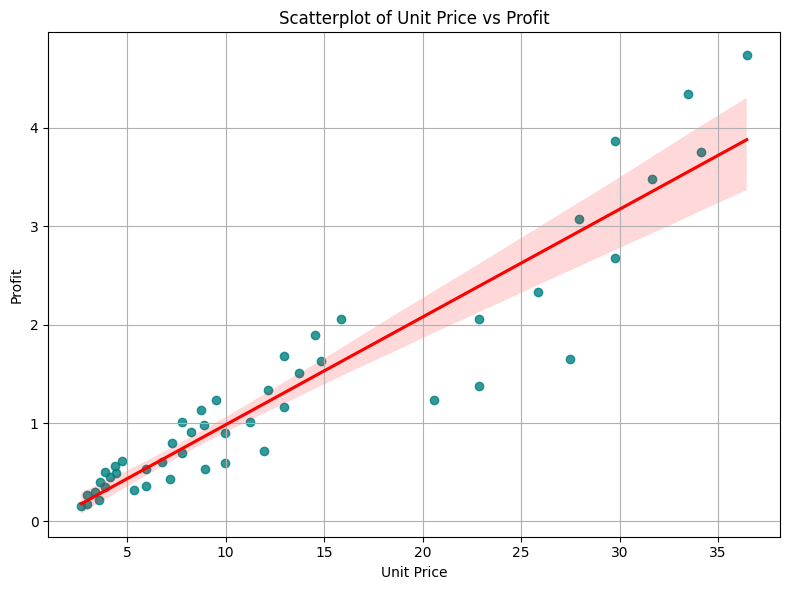

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=products, x='Unit Price', y='Profit', color='teal', line_kws={"color": "red"})

plt.title('Scatterplot of Unit Price vs Profit')
plt.xlabel('Unit Price')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 5. Scatterplot of Unit Price and Profit**  
The scatterplot displays the relationship between **Unit Price** and **Profit** for each coffee product in the dataset. Each teal point represents a product, with its unit price on the x-axis and the corresponding profit on the y-axis.

The red regression line illustrates the overall linear trend. As shown, products with higher unit prices tend to generate higher profits, confirming the positive relationship observed in the Pearson correlation analysis (r = 0.939, p < 0.001).

📌 **Conclusion**: There exists a statistically significant linear correlation between unit price and profit among coffee products.

While our initial analysis shows a strong positive correlation between unit price and profit, this does not account for how well each product actually sells. High-priced items may yield high per-unit profits, but low sales volumes could limit their total profitability. To explore this further, we now ask:

**Do sales volumes influence total profit for higher-priced coffee products?**

To answer this question, we focus on the following variables:

- From the `products` dataset:
  - **Unit Price**: The retail price per unit of each coffee product.
  - **Profit**: The total profit associated with each product.
- From the `orders` dataset:
  - **Quantity**: The number of units ordered per product.

This analysis will help determine whether limited demand for expensive products affects their overall contribution to profit.

Before conducting the test, we define our hypotheses:


**Null Hypothesis (H₀)**: There is no significant linear correlation between sales volume (Quantity) and total profit for higher-priced coffee products.  
**Alternative Hypothesis (Hₐ)**: There is a significant linear correlation between sales volume (Quantity) and total profit for higher-priced coffee products.

We will calculate the Pearson correlation coefficient and evaluate the associated p-value. This will allow us to determine both the strength of the linear relationship and whether the result is statistically significant at the conventional 0.05 significance level.

We will use `clean_coffee_df`, a merged and cleaned dataset combining product and order details needed to compute total profit per product.

#### **Group by Product**

We group the merged data by each product to calculate:
- Total quantity sold
- Per-unit profit and unit price (from `products`)
- Total profit = Quantity × Profit

In [ ]:
grouped = clean_coffee_df.groupby(['Product ID', 'Coffee Type', 'Roast Type']) \
    .agg({
        'Quantity': 'sum',
        'Profit': 'first',
        'Unit Price': 'first'
    }).reset_index()

grouped['Total Profit'] = grouped['Quantity'] * grouped['Profit']
grouped.head()

C:\Users\punsa\AppData\Local\Temp\ipykernel_9976\48503138.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = clean_coffee_df.groupby(['Product ID', 'Coffee Type', 'Roast Type']) \


,Product ID,Coffee Type,Roast Type,Quantity,Profit,Unit Price,Total Profit
0,A-D-0.2,Ara,D,97,0.26865,2.985,26.05905
1,A-D-0.2,Ara,L,0,NaN,NaN,NaN
2,A-D-0.2,Ara,M,0,NaN,NaN,NaN
3,A-D-0.2,Exc,D,0,NaN,NaN,NaN
4,A-D-0.2,Exc,L,0,NaN,NaN,NaN


#### **Focus on High-Priced Products**

We define "high-priced" as products whose unit price falls in the top 25% of all products.

In [ ]:
q3_price = grouped['Unit Price'].quantile(0.75)
high_priced = grouped[grouped['Unit Price'] >= q3_price]
high_priced.head()

#### **Correlation Analysis**

We calculate the Pearson correlation coefficient to assess the linear relationship between **quantity sold** and **total profit** for high-priced products.

In [ ]:
corr, pval = pearsonr(high_priced['Quantity'], high_priced['Total Profit'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {pval:.4f}")

The Pearson correlation coefficient between **Quantity** and **Total Profit** for higher-priced products is **0.301**, indicating a **weak positive linear relationship**. 

However, the **p-value is greater than 0.05** (p = 0.3418), so the result is **not statistically significant**. Therefore, we **fail to reject the null hypothesis**.

#### **Visualization**

To visually support the correlation result, we generate a scatterplot with a regression line showing how quantity sold relates to total profit for high-priced products.

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=high_priced,
    x='Quantity',
    y='Total Profit',
    color='teal',
    line_kws={"color": "red"}
)

plt.title('Quantity Sold vs Total Profit (High-Priced Products)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 2.**  
The scatterplot illustrates the relationship between **quantity sold** and **total profit** for high-priced coffee products. Each teal point represents a product, where the x-axis shows the total number of units sold and the y-axis displays the corresponding total profit.

The red regression line represents the overall linear trend based on Pearson correlation analysis. While there is a slight upward trend, the distribution of points appears scattered, and no strong linear relationship is visually evident.

This aligns with the earlier statistical result (r = 0.301, p = 0.3418), suggesting that the correlation between sales volume and total profit among high-priced items is weak and not statistically significant. This indicates that simply pricing products higher does not guarantee greater overall profit if the products do not sell in large volumes.

📌 **Conclusion**: There is no statistically significant linear correlation between sales volume and total profit for high-priced coffee products.

# Conclusion ✅

// INSERT CONCLUSION HERE